# Heirarchical clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Dataset\\Mall_Customers.csv')

In [3]:
dataset.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
X = dataset.iloc[:,[3,4]].values

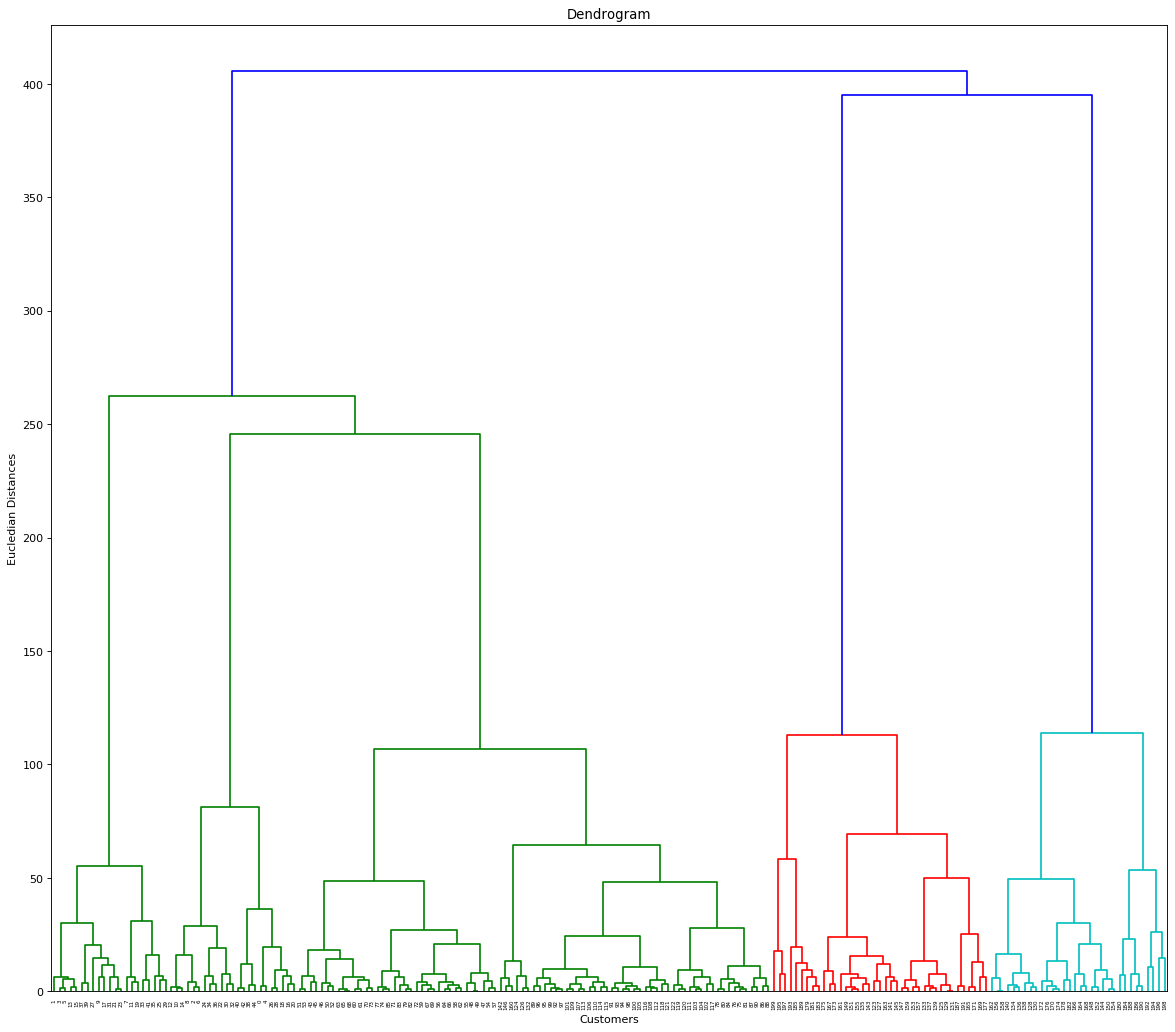

In [5]:
#Using Dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(18,16),dpi=80,facecolor='w',edgecolor='k')
dendrogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian Distances')
plt.show()

**linkage** : linkage is actually the algorithm itself of heirarchical clustering<br>
arguments of linkage :
X - On which data we want to apply the algorithm.<br>
**method**  argument is the method that is used to find the clusters, here  method is `ward`.<br>
**ward** : It is the method that tries to minimise the **variance** in each cluster.<br> In K-Means clustering we used to minimize within cluster sum of square(wcss) to plot our elbow method chart, instead here we are going to mininmize within cluster variance.<br>

From the graph we will see the largest vertical distance that is made by the dendrogram plot without crossing any horizontal line. 

In [6]:
from IPython.display import Image

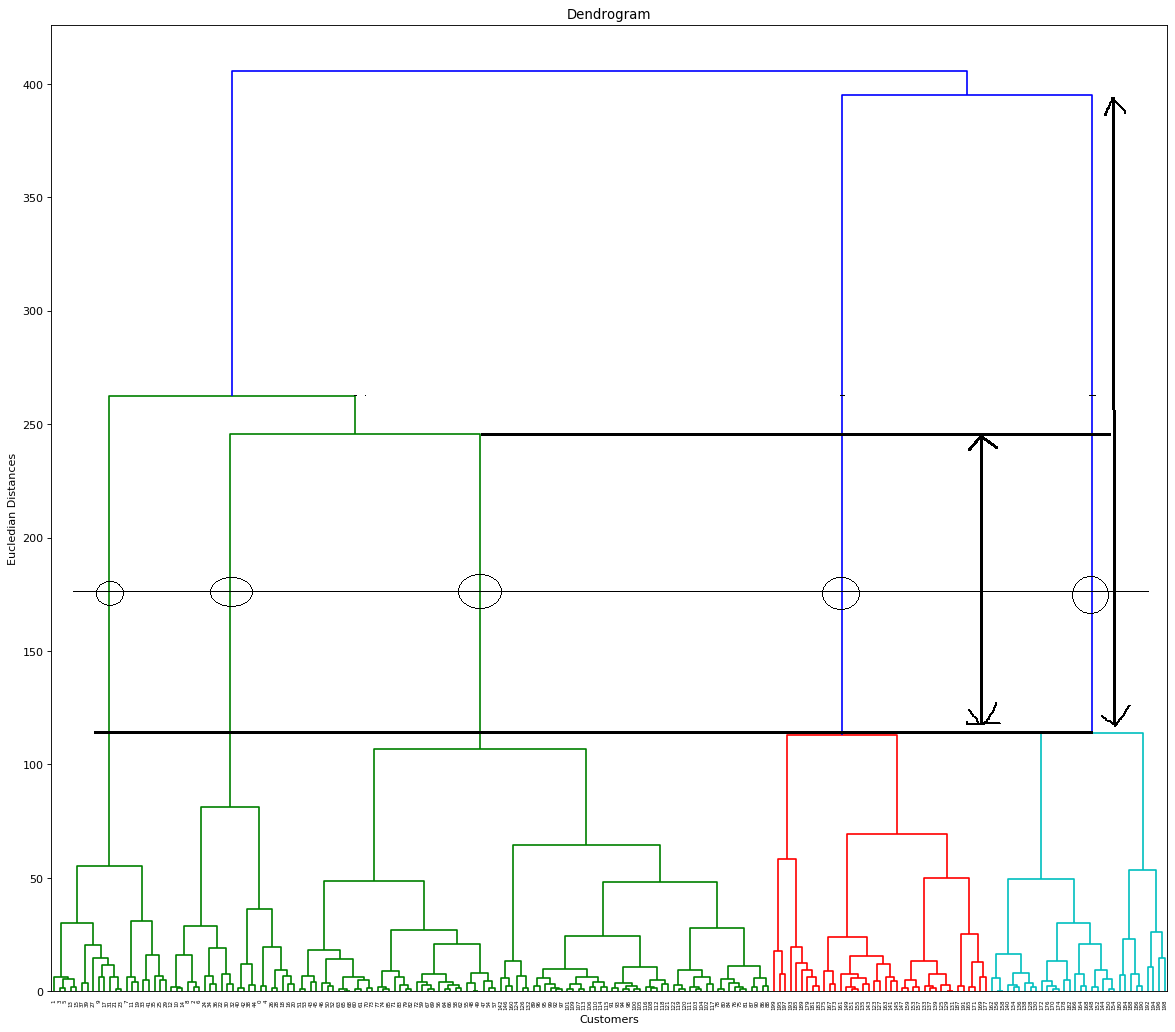

In [7]:
Image(filename='Snapshot\\image2.png')

The smaller vertical arrow is showing the largest vertical line that can be drawn without crossing any horizontal line.<br>
So as we can see a horizontal line is cutting the vertical line at 5 points, so from here we can conclude that number of clusters that is required is 5. 

In [8]:
#Fitting heirarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity= 'euclidean',linkage='ward') #we prepared heirarchical clustering algorithm

**affinity** : Distance to do the linkage.<br>


Next we will fit the heirarchical clustering algorithm to our data X.<br>
And we will create clusters vector i.e. the vector that tells that for each customer which **cluster the customers belong to**.

In [9]:
y_hc = hc.fit_predict(X)

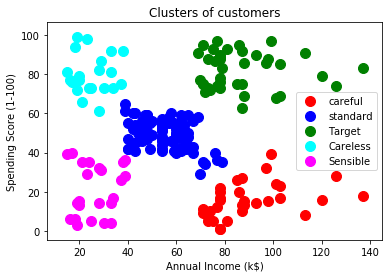

In [10]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()